In [1]:
# Import the necessary libraries
import cv2           # for image processing
import matplotlib.pyplot as plt   # for image visualization
import numpy as np   # for numerical operations

In [2]:
# Load an image from a file using OpenCV's 'imread' function 
# The second argument (-1) specifies that the image should be loaded with alpha channel transparency
# Store the resulting image data in the 'image' variable
image = cv2.imread('original.jpg', -1)

# Get the shape of the 'image' variable
# This returns a tuple with three values: the image height, the image width, and the number of color channels
# If the image is grayscale, the number of color channels will be 1; if it is color, it will be 3 or 4 (with alpha channel)
image.shape


(768, 1024)

In [3]:
# Define a function for showing an image using matplotlib
def showing_plt(image, hight=5, width=8, map="gray"):
    # Create a new figure with the specified size and resolution
    plt.figure(figsize=(hight,width), dpi=100)
    # Display the image with the specified color map
    plt.imshow(image, cmap=map)
    # Turn off the axis labels to avoid clutter
    plt.axis('off')

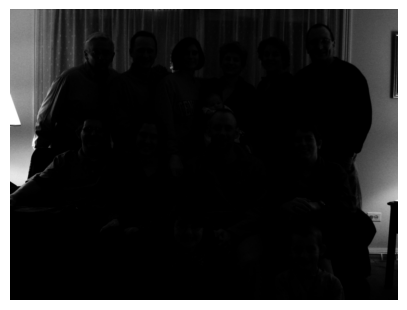

In [4]:
# Call the 'showing_plt' function with the specified image as input
showing_plt(image)

In [5]:
# Define a function that displays a histogram of pixel values in an image using matplotlib
def display_histogram_plt(image, bins=256, range=(0,256)):
    # Create a new figure with the specified size and resolution
    plt.figure(figsize=(4,3), dpi=100)
    # Calculate the histogram of pixel values in 'image' using the specified bins and range
    hist = cv2.calcHist([image], [0], None, [bins], range)
    # Plot the histogram using matplotlib
    plt.hist(image.flat, bins, range)
    # Show the plot on the screen
    plt.show()

## 1 - Does the original image need to enhance? (use original image histogram to prove your answer)

Let's start by defining what we mean by contrast in an image. Contrast is the difference between the darkest and brightest parts of an image, and it determines how well fine details can be distinguished in an image. A high contrast image has sharp edges, deep shadows, and bright highlights, while a low contrast image looks flat and dull.

We need to display the histogram of the original image using the display_histogram_plt() function. Once we have the histogram.
If the histogram is skewed towards one end of the intensity range (i.e. mostly black or mostly white), then the image may benefit from contrast enhancement. 
If the histogram is evenly distributed across the entire intensity range, then the image may not need any enhancement.

This code will display a histogram of the pixel values in the 'image' variable using the 'display_histogram_plt' function. The histogram shows the distribution of intensity values across the entire image, indicating that the image needs enhancement.

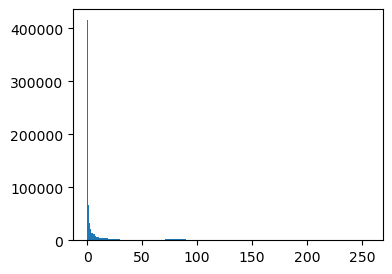

In [6]:
# Call the 'display_histogram_plt' function with the 'image' variable as input
display_histogram_plt(image)

## 2- enhance the original image to output image using contrast enhancement ways?

### contrast streching

Contrast stretching (also known as contrast enhancement) is a simple image processing technique that is used to improve the contrast of an image. It works by expanding the intensity range of an image such that the darkest pixel becomes completely black (assigned an intensity of 0) and the brightest pixel becomes completely white (assigned an intensity of 255). Pixels with intermediate intensity values are then scaled linearly between these two extremes.

To apply contrast stretching to an image, you first need to find the minimum and maximum intensity values of the image.
Next, you need to rescale the intensity values of each pixel to lie within the new intensity range of 0 to 255. This is done using a linear transform that maps the old intensity range to the new intensity range. The exact formula used for the transformation depends on the range and type of the input image, as well as the desired output intensity range.
Once you have applied the transformation to all the pixels, the contrast-enhanced image is ready for display or further processing.
Contrast stretching is a simple and effective technique for enhancing the contrast of images, but it is not always the best choice for every situation. Other enhancement techniques may need to be explored to optimize the quality of the image depending on the original image and the requirements of the project or application for which the image is being used.

In this code, the minimum and maximum intensity values for the new image are defined as min_intensity_new_image and max_intensity_new_image, respectively.

In the next lines of code, the minimum and maximum intensity values of the input image are calculated using the np.max(image) and np.min(image) functions and stored as max_intensity_old_image and min_intensity_old_image, respectively.

The contrast_stretching variable is then calculated using NumPy operations to apply contrast stretching to the input image.

Finally, the contrast-stretched image is displayed using the showing_plt() function. However, the comment after the code suggests that contrast stretching does not improve the overall quality of the image in this case. This could be due to a variety of factors, such as poor lighting conditions or the presence of noise in the image. Other enhancement techniques may need to be explored to improve the quality of the image.

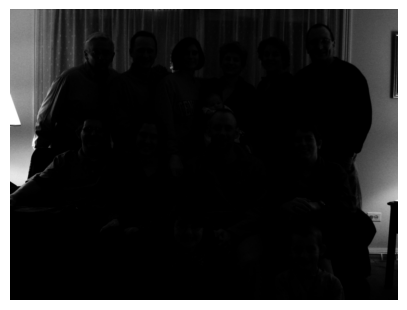

In [7]:
# Define the minimum and maximum intensity values for the new image
min_intensity_new_image = 0
max_intensity_new_image = 255

# Find the maximum and minimum intensity values of the original image
max_intensity_old_image = np.max(image)
min_intensity_old_image = np.min(image)

# Calculate the contrast stretching transformation of the image
contrast_stretching = np.uint8(((image - min_intensity_old_image)/(max_intensity_old_image - min_intensity_old_image))
                              *(max_intensity_new_image - min_intensity_new_image) + (min_intensity_new_image))

# Display the contrast-stretched image using the 'showing_plt' function
showing_plt(contrast_stretching)

# As you can see, contrast stretching does not improve the overall quality of the image.

### Histogram Equalization

Histogram equalization is a technique used to improve the contrast of an image. It is often used when an image has a narrow intensity range, and its features are not easy to discern.

The algorithm works by redistributing the pixel intensity values in a way that maximizes the overall contrast of the image. It does this by first computing a histogram of the image, which is a graph of the frequency of the intensity values in the image. The histogram reflects the distribution of pixel intensity values across the entire image.

Once the histogram is calculated, the algorithm then transforms the pixel intensities in the original image in a way that makes the histogram as flat as possible. This is done by mapping the original pixel intensities to new, equalized intensities that are spread out as evenly as possible across the intensity range of the image. This makes the darker areas of the image brighter and the brighter areas darker, resulting in an image with improved contrast and better visual details.

The process of histogram equalization can be applied to a color image by performing this operation on each color channel separately.

In summary, histogram equalization is an image enhancement technique that improves the contrast of an image by redistributing the pixel intensity values in a way that maximizes the overall contrast of the image.

In this code, the cv2.equalizeHist() function is used to apply histogram equalization to the input image. The output of this function is stored in the histogram_equalization variable.

Next, the display_histogram_plt() function is called to display a histogram of the pixel intensities in the equalized image. This is done to visually assess the success of the histogram equalization process. If the histogram now has a more even distribution of pixel intensities, the technique was likely successful in improving contrast and highlighting image details.

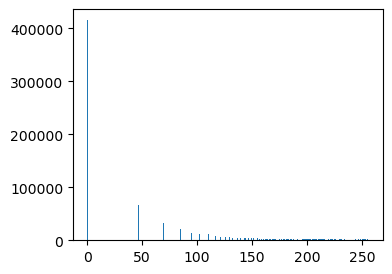

In [8]:
# Apply histogram equalization to the input 'image' using the 'cv2.equalizeHist()' function
histogram_equalization = cv2.equalizeHist(image)

# Display the histogram of the equalized image using the 'display_histogram_plt()' function
display_histogram_plt(histogram_equalization)

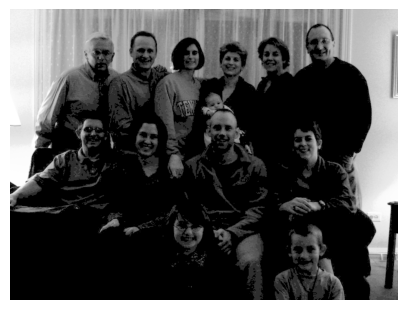

In [9]:
# Let's see the results.
showing_plt(histogram_equalization)

### Gamma


Gamma correction is a technique of adjusting the brightness and contrast of the image by applying a nonlinear transformation to the image's pixel values. The gamma correction value is typically greater than 0 and less than 1 for brightening the image and typically greater than 1 for darkening the image.

Here's how the code works in detail:

- We set the value of gamma_value to 0.4. This value determines how much the gamma correction will affect the image's brightness and contrast. You can change this value to get the desired effect.

- The formula np.uint8(((image/255)**gamma_value)*255) calculates the gamma-corrected image. In this formula, the value of image represents the input image, and the value of gamma_value represents the gamma correction value. The ** operator raises the pixel values of the input image to the power of gamma_value, and then the resulting values are scaled to the range of 0-255 using the np.uint8() function. The output of this formula is the gamma-corrected image.

- The gamma correction algorithm works by applying a power-law function to the pixel values of the image. The formula raises each pixel value to the power of Gamma, which is the gamma correction value. This causes the dark areas of the image to become darker and the bright areas to become brighter, increasing the contrast of the image.

- Finally, the display_histogram_plt() function to display the histogram for the gamma-corrected image. A histogram is a graphical representation of the frequency distribution of pixel intensities in an image. It displays how many pixels in the image have a certain intensity value. The histogram can help you determine the overall brightness and contrast of an image.

In summary, the Gamma algorithm for contrast enhancement adjusts the brightness and contrast of an image by changing the gamma value of the image and applying a mathematical formula to modify the brightness and contrast of each pixel in the image based on the gamma value. This formula is used to calculate the gamma-corrected image, and the histogram of the corrected image is displayed using the display_histogram_plt() function.

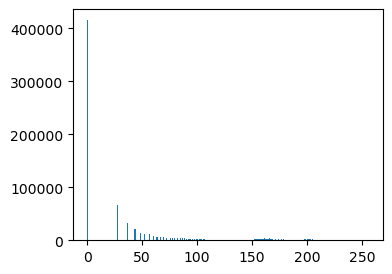

In [10]:
# Set the value of the landa constant to 0.4
gamma_value = 0.4

# Calculate the gamma value based on the landa constant and the input image
# A gamma value less than 1 will make the image brighter and a gamma value greater than 1 will make it darker
gamma = np.uint8(((image/255)**gamma_value)*255)

# Display the histogram of the gamma corrected image
display_histogram_plt(gamma)

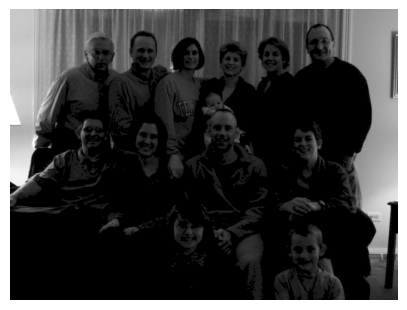

In [11]:
# Let's see the results.
showing_plt(gamma)